In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/machine_learning_cl

/content/drive/My Drive/machine_learning_cl


# get the data from txt 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]


## Logistic Regression
$$
\hat{h}=σ(z)\\
$$
$$
z=g(x,y,\theta)
$$

$$
\Theta = (\theta_0, \theta_1, ..., \theta_k-1)
$$

$$
g(x,y, \theta)=\sum_{i=0}^{9}\sum_{i=0}^{9}\theta_{i,j}​x^iy^j
$$
    the dimension k of θ can be 16, but it can be less than that. 
    you can choose k for the best performance

$$
\sigma(z) = \frac{1}{1 + \exp(-z)}​
$$

## Object function 
$$
J(\theta_0, \theta_1, \theta_2) = \frac {1} {m} ​ \sum_{i=1}^m​(−l^{(i)}
log(σ(z^{(i)}))−(1−l^{(i)})log(1−σ(z^{(i)}))) + \frac {\lambda} {2}
\sum_{i= 0}^{9} \sum_{j=0}^{9} \theta^2_{i,j}
$$​

##Calculate the training accuracy

$$
accuracy = \frac {the\ number\ of\ correct\ predictions} {total\ number\ of\ prediction}
$$

In [0]:
## Feature Scaling - mean normalization
x = pointX
y = pointY
x = (x - np.mean(x))/len(x)
y = (y - np.mean(y))/len(y)
#print(x)
#print(y)

In [0]:
""" non - linear decision boundary""" 

from math import exp


## feauture function 
def boundary(Theta, x, y):
  a = np.arange(0,10, 1)
  b = np.arange(0,10, 1)

  a, b = np.meshgrid(a, b)
  a = a.flatten()
  b = b.flatten()
  line = np.zeros(len(y))

  for i,j in zip(a,b):
    line += np.array((x**j)*(y**i))*Theta[j][i] # array * 상수
  #print(line)
  return line 

def sigmoid(z):
  return (1/(1+(exp(-z))))

## hypothesis for line decision

def hypo(Theta, x, y):
  hypothesis = np.array([ sigmoid(l) for l in boundary(Theta, x, y)])
  return hypothesis

def J(Theta, x, y,lamb):
  a = np.arange(0,10, 1)
  b = np.arange(0,10, 1)

  a, b = np.meshgrid(a, b)
  a = a.flatten()
  b = b.flatten()
  H = hypo(Theta, x, y)

  cost =  (1/len(label))*np.sum((-label)*(np.array([np.log(h) for h in H ]))
  - (1 - label)*np.array([np.log(1-h) for h in H]))
  + 2/lamb*np.sum([((Theta[j][i])**2) for i, j in zip(a,b)])
  return cost 

"""
 원의 조건
 theta3의 부호와 theta4의 부호가 같다
"""
from matplotlib import path

def cal_accuracy(Theta, x, y):
  q = [(x[i], boundary(Theta, x, y)[i]) for i in range(len(y))]
  p = path.Path(q)
  q2 = [(x[i], y[i]) for i in range(len(y))]
  iftrue = p.contains_points(q2)
  
  ## check if the prediction is correct
  count = 0
  for real, hypo in zip(label,iftrue):
    if real == hypo:
      count = count + 1
  
  accuracy = count/len(y)
  return accuracy

## Gradient Descent

pseudo code

repeat{
$$
\theta_k^{(t+1)} = \theta_0^{(t)} -  \alpha  [\frac {1} {m} \sum_{i=1}^m (\sigma
(g(x^{(i)}, y^{(i)}, \theta)) - l^{(i)}) \frac { \alpha g(x^{(i)}, y^{(i)}, \theta)} {\alpha \theta_k} + λ*\theta_{i,j}^{(t)}​] \\ for\ all\ k
$$ 
}



actual code
$$
\theta_0 = \theta_0 - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i}) 
$$

$$
\theta_j = \theta_j (1-\frac {\lambda} {m} \alpha)- \alpha [\frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})x^{i} ]
$$


In [0]:
## setting for GD
Theta = np.ones((10,10))
alpha = 0.1
lmb1 = 1000
lmb2 = 10000
lmb3 = 10

itr = 5000
list_thetas = np.zeros((itr, len(Theta)*len(Theta)))
list_J      = np.zeros(itr)
list_accuracy = np.zeros(itr)


In [0]:
a = np.arange(0,10, 1)
b = np.arange(0,10, 1)

a, b = np.meshgrid(a, b)
a = a.flatten()
b = b.flatten()

for loop in np.arange(itr):
  f= open('output-1000-1.log','a')
  cost = J(Theta, x, y,lmb1)
  list_J[loop] = cost
  accuracy = cal_accuracy(Theta, x,y)
  list_accuracy[loop] = accuracy

  #gradient descent
  temp0 = Theta[0][0] - alpha *(1/len(label))*np.sum((hypo(Theta,x, y)-label))
  #print("temp",temp0)
  Theta[0][0] = temp0
  for i,j in zip(a,b):
    if (i != 0 and j != 0):
      temp1 = Theta[j][i]*(1-alpha*lmb1/len(label)) - alpha *((1/len(label))*np.sum((hypo(Theta,x, y)-label)*(x**i)*(y**j)) - lmb1/len(label)*Theta[j][i])
      Theta[j][i] = temp1
      list_thetas[loop][j*10+i] = temp1
  
  print("iteration : ", loop, file=f)
  print("accuracy", accuracy,  file=f)
  print("cost : ", cost,  file=f)
  #for i,j in zip(a,b):
  #  print("theta:", j*10+i," ", Theta[j][i], end = ' ',  file=f)
  print("\n", file=f)
  f.close()
 


#The Result

##plot the data

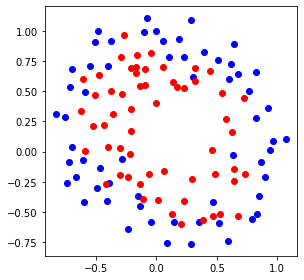

In [6]:

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


##Write down the high dimensional function g(x,y;θ)
$$ 
g(x,y, \theta)=\theta_0​+\theta_1x+\theta_2y+\theta_3x^2+\theta_4y^2
$$

##Plot the training error

NameError: ignored

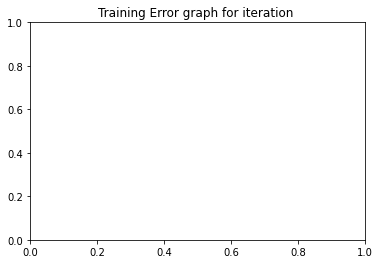

In [7]:
#J(th0, th1, th2, th3, th4, x, y)
plt.title("Training Error graph for iteration ")
plt.plot(np.arange(itr),list_J, color = 'blue' )

plt.show()

##Plot the training accuracy

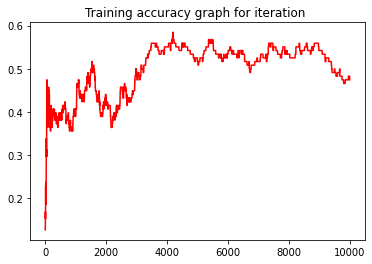

In [111]:
plt.title("Training accuracy graph for iteration ")
plt.plot(np.arange(itr), list_accuracy, color = 'red' )

plt.show()

##Write down the final training accuracy

In [0]:
print("final accurary : {}%".format(round(accuracy, 3)*100))

final accurary : 80.5%


##Plot the optimal classifier superimposed on the training data 

<function matplotlib.pyplot.show>

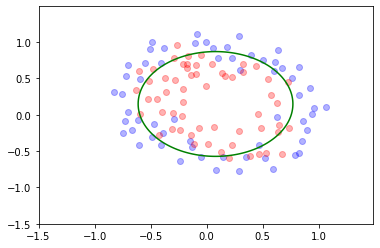

In [0]:
ax_x = np.arange(-1.5,1.5, 0.01)
ax_y = np.arange(-1.5,1.5, 0.01)
x_g, y_g = np.meshgrid(ax_x, ax_y)
plt.contour(x_g, y_g, boundary(th0, th1, th2, th3, th4, x_g, y_g), [0], colors = 'green')
plt.scatter(pointX0, pointY0, alpha=0.3, c='b')
plt.scatter(pointX1, pointY1, alpha=0.3, c='r')

plt.show